Autores do Notebook:

- Otávio Kamel
- Wesley Souza

# 0. Import & Settings

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt


from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from boruta import BorutaPy
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, make_scorer, accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [6]:
sns.set_style('darkgrid')

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 50)
pd.set_option('min_rows', 20)
pd.set_option('precision', 2) 
pd.options.display.float_format = '{:.2f}'.format

In [7]:
%matplotlib inline

%pylab inline

plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 24

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

sns.set()

sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


# 1. Data Description

In [8]:
df1 = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [9]:
df1.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS           NObeyesdad
0  Female 21.00    1.62   64.00                            yes   no  2.00 3.00  Sometimes    no  2.00   no 0.00 1.00          no  Public_Transportation        Normal_Weight
1  Female 21.00    1.52   56.00                            yes   no  3.00 3.00  Sometimes   yes  3.00  yes 3.00 0.00   Sometimes  Public_Transportation        Normal_Weight
2    Male 23.00    1.80   77.00                            yes   no  2.00 3.00  Sometimes    no  2.00   no 2.00 1.00  Frequently  Public_Transportation        Normal_Weight
3    Male 27.00    1.80   87.00                             no   no  3.00 3.00  Sometimes    no  2.00   no 2.00 0.00  Frequently                Walking   Overweight_Level_I
4    Male 22.00    1.78   89.80                             no   no  2.00 1.00  Sometimes    no  2.00   no 0.00 0.00   Sometimes  Public_Transportation  Overweight_Level_II

In [10]:
print(f'O dataset possui {df1.shape[0]} linhas e {df1.shape[1]} colunas')

O dataset possui 2111 linhas e 17 colunas


In [11]:
df1.describe()

Age  Height  Weight    FCVC     NCP    CH2O     FAF     TUE
count 2111.00 2111.00 2111.00 2111.00 2111.00 2111.00 2111.00 2111.00
mean    24.31    1.70   86.59    2.42    2.69    2.01    1.01    0.66
std      6.35    0.09   26.19    0.53    0.78    0.61    0.85    0.61
min     14.00    1.45   39.00    1.00    1.00    1.00    0.00    0.00
25%     19.95    1.63   65.47    2.00    2.66    1.58    0.12    0.00
50%     22.78    1.70   83.00    2.39    3.00    2.00    1.00    0.63
75%     26.00    1.77  107.43    3.00    3.00    2.48    1.67    1.00
max     61.00    1.98  173.00    3.00    4.00    3.00    3.00    2.00

In [12]:
df1.isna().sum().sum()

0

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [14]:
df1.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [15]:
df1.dtypes.value_counts()

object     9
float64    8
dtype: int64

In [16]:
num_attr = df1.select_dtypes(exclude='object')
cat_attr = df1.select_dtypes(include='object')

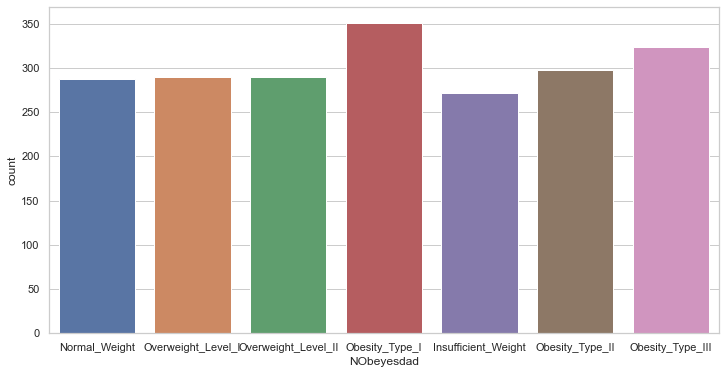

In [17]:
sns.countplot(x=df1['NObeyesdad']);

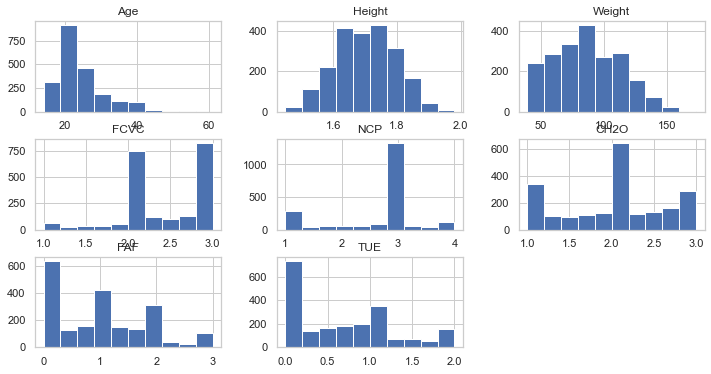

In [18]:
df1.hist();

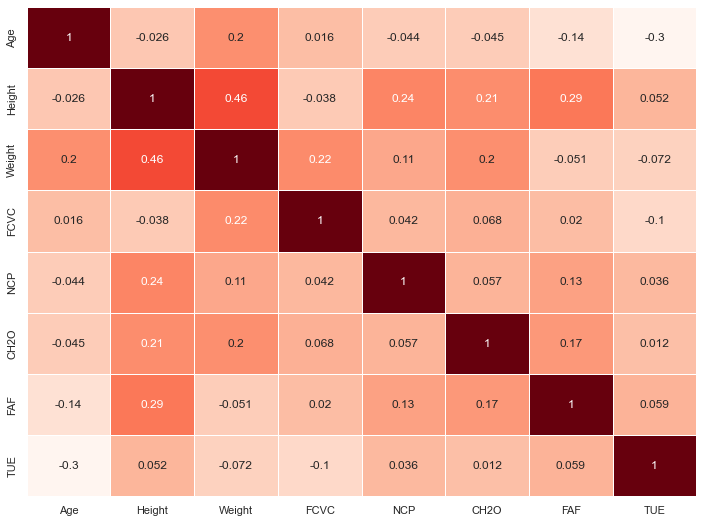

In [19]:
# Verificando correlação entre as características
corr_input_var = num_attr.corr()

fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_input_var, annot=True, cbar=False, cmap='Reds', linewidths=.5, ax=ax);

In [20]:
df1.describe(include='object') 

Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC       CALC                 MTRANS      NObeyesdad
count    2111                           2111  2111       2111  2111  2111       2111                   2111            2111
unique      2                              2     2          4     2     2          4                      5               7
top      Male                            yes   yes  Sometimes    no    no  Sometimes  Public_Transportation  Obesity_Type_I
freq     1068                           1726  1866       1765  2067  2015       1401                   1580             351

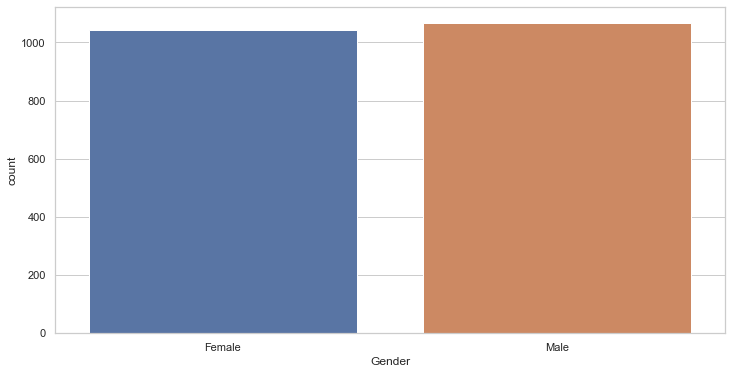

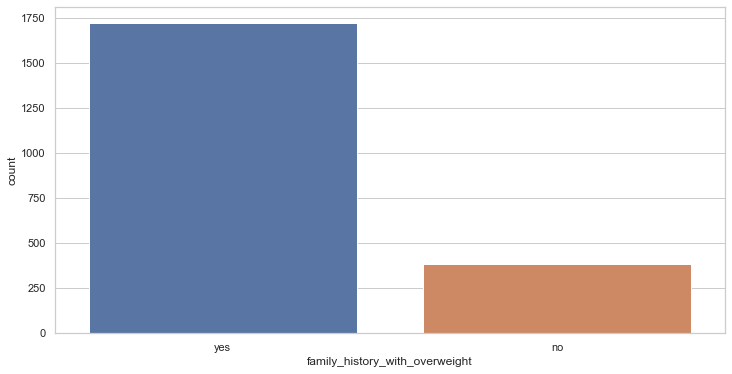

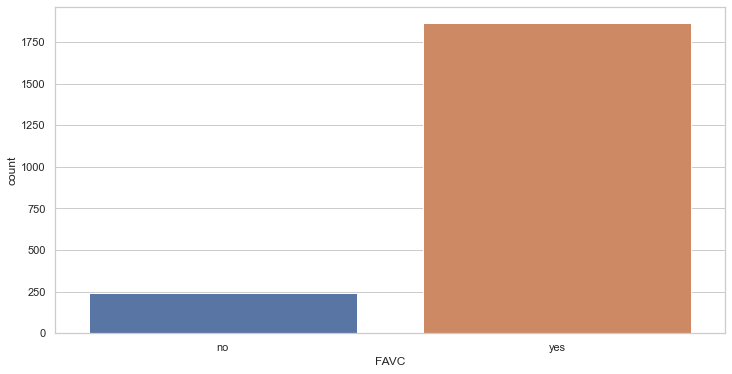

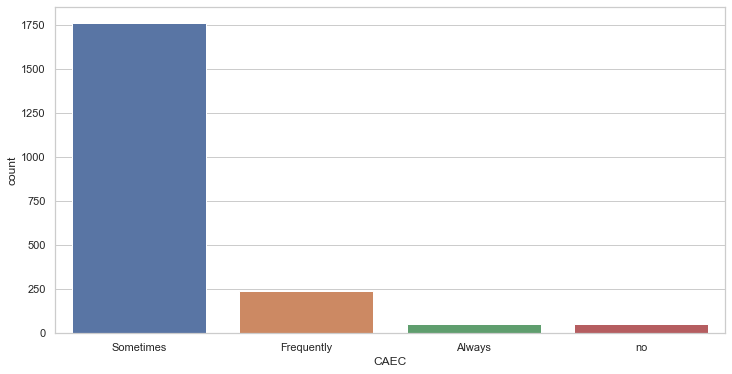

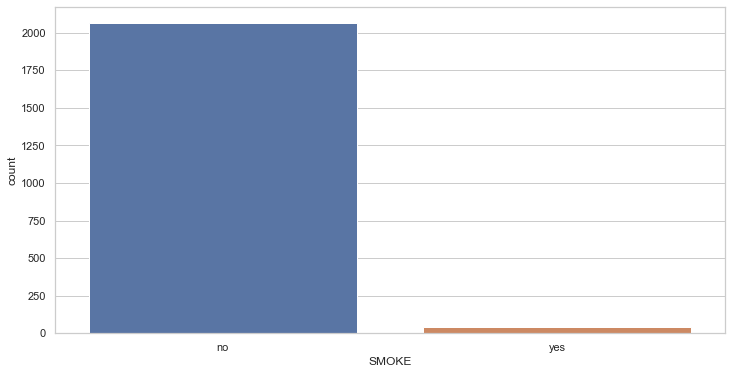

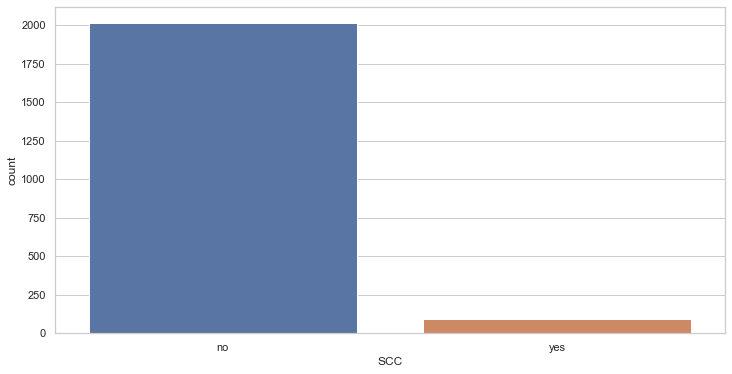

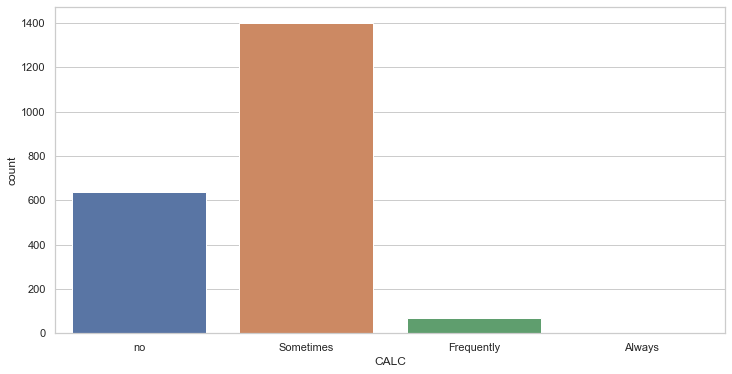

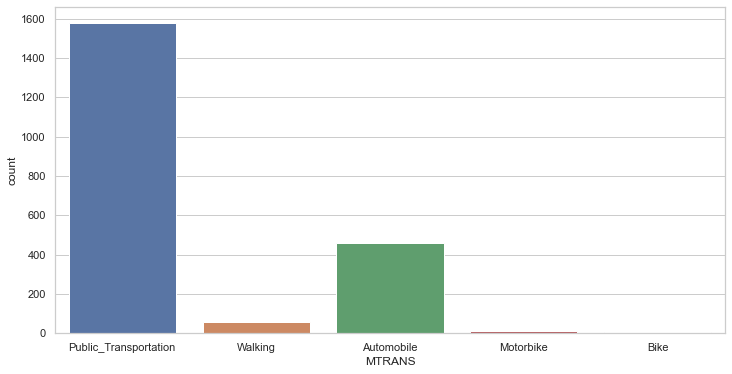

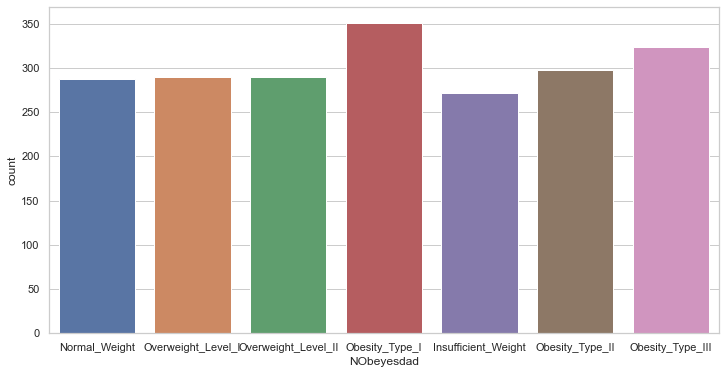

In [21]:
for column in df1.select_dtypes(include='object'):
    if df1[column].nunique() < 10:
        sns.countplot(x=column, data=df1)
        plt.show()

In [22]:
### Verificando frequência relativa entre atributos categóricos com menos de 5 valores distintos
for col in df1.drop('NObeyesdad', axis=1).select_dtypes(include='object'):
    if df1[col].nunique() <=4:
        display(pd.crosstab(df1['NObeyesdad'], df1[col], normalize='index'))

Gender               Female  Male
NObeyesdad                       
Insufficient_Weight    0.64  0.36
Normal_Weight          0.49  0.51
Obesity_Type_I         0.44  0.56
Obesity_Type_II        0.01  0.99
Obesity_Type_III       1.00  0.00
Overweight_Level_I     0.50  0.50
Overweight_Level_II    0.36  0.64

family_history_with_overweight   no  yes
NObeyesdad                              
Insufficient_Weight            0.54 0.46
Normal_Weight                  0.46 0.54
Obesity_Type_I                 0.02 0.98
Obesity_Type_II                0.00 1.00
Obesity_Type_III               0.00 1.00
Overweight_Level_I             0.28 0.72
Overweight_Level_II            0.06 0.94

FAVC                  no  yes
NObeyesdad                   
Insufficient_Weight 0.19 0.81
Normal_Weight       0.28 0.72
Obesity_Type_I      0.03 0.97
Obesity_Type_II     0.02 0.98
Obesity_Type_III    0.00 1.00
Overweight_Level_I  0.08 0.92
Overweight_Level_II 0.26 0.74

CAEC                 Always  Frequently  Sometimes   no
NObeyesdad                                             
Insufficient_Weight    0.01        0.44       0.54 0.01
Normal_Weight          0.12        0.29       0.55 0.03
Obesity_Type_I         0.02        0.02       0.96 0.00
Obesity_Type_II        0.01        0.00       0.99 0.00
Obesity_Type_III       0.00        0.00       1.00 0.00
Overweight_Level_I     0.02        0.05       0.81 0.12
Overweight_Level_II    0.01        0.06       0.93 0.00

SMOKE                 no  yes
NObeyesdad                   
Insufficient_Weight 1.00 0.00
Normal_Weight       0.95 0.05
Obesity_Type_I      0.98 0.02
Obesity_Type_II     0.95 0.05
Obesity_Type_III    1.00 0.00
Overweight_Level_I  0.99 0.01
Overweight_Level_II 0.98 0.02

SCC                   no  yes
NObeyesdad                   
Insufficient_Weight 0.92 0.08
Normal_Weight       0.90 0.10
Obesity_Type_I      0.99 0.01
Obesity_Type_II     1.00 0.00
Obesity_Type_III    1.00 0.00
Overweight_Level_I  0.87 0.13
Overweight_Level_II 0.99 0.01

CALC                 Always  Frequently  Sometimes   no
NObeyesdad                                             
Insufficient_Weight    0.00        0.00       0.57 0.43
Normal_Weight          0.00        0.06       0.56 0.37
Obesity_Type_I         0.00        0.04       0.49 0.47
Obesity_Type_II        0.00        0.01       0.75 0.24
Obesity_Type_III       0.00        0.00       1.00 0.00
Overweight_Level_I     0.00        0.06       0.77 0.17
Overweight_Level_II    0.00        0.07       0.49 0.44

# 2.0 Exploratory Data Analysis

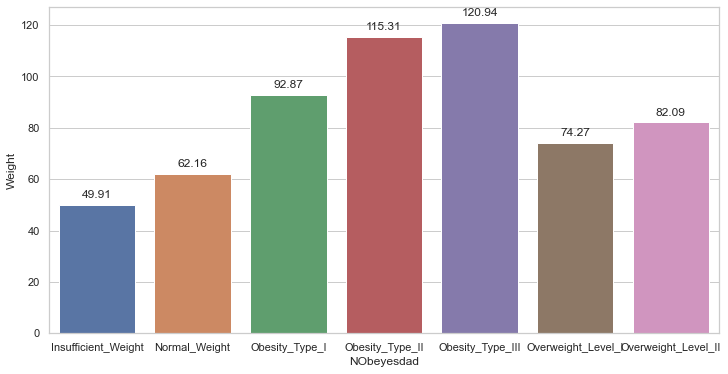

In [23]:
df_temporario = df1[['Weight', 'NObeyesdad']].groupby('NObeyesdad').mean().reset_index()
ax = sns.barplot(data=df_temporario, x='NObeyesdad', y='Weight');

# código para mostrar os valores das colunas no gráfico
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

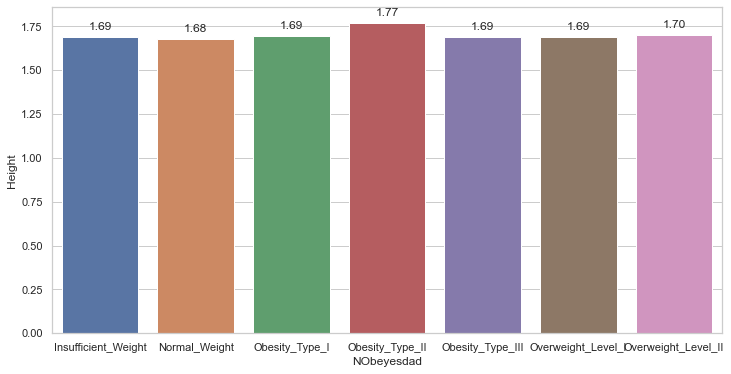

In [24]:
df_temporario = df1[['Height', 'NObeyesdad']].groupby('NObeyesdad').mean().reset_index()
ax = sns.barplot(data=df_temporario, x='NObeyesdad', y='Height');

# código para mostrar os valores das colunas no gráfico
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

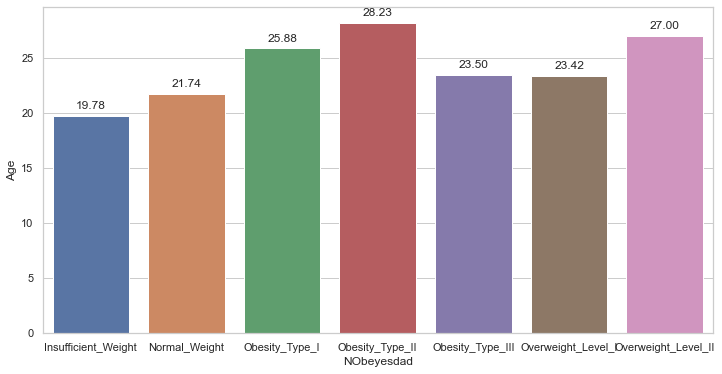

In [25]:
df_temporario = df1[['Age', 'NObeyesdad']].groupby('NObeyesdad').mean().reset_index()
ax = sns.barplot(data=df_temporario, x='NObeyesdad', y='Age');

# código para mostrar os valores das colunas no gráfico
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# 3. Pre-Processing

In [26]:
df2 = df1.copy()

## 3.1 Scaling

In [27]:
num_attr.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [28]:
# Checando Outliers para escolher RobustScaler ou MinMaxScaler

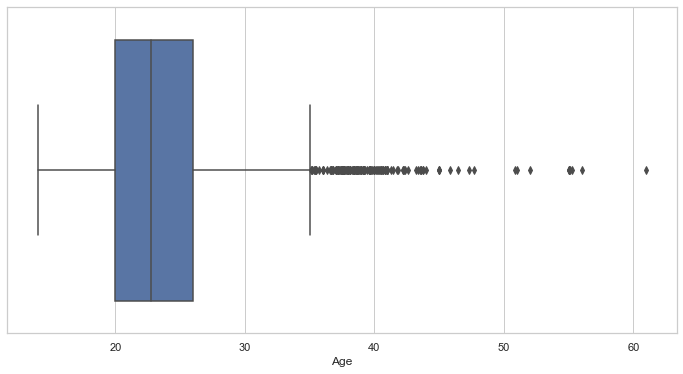

In [29]:
sns.boxplot(x = df2['Age']);

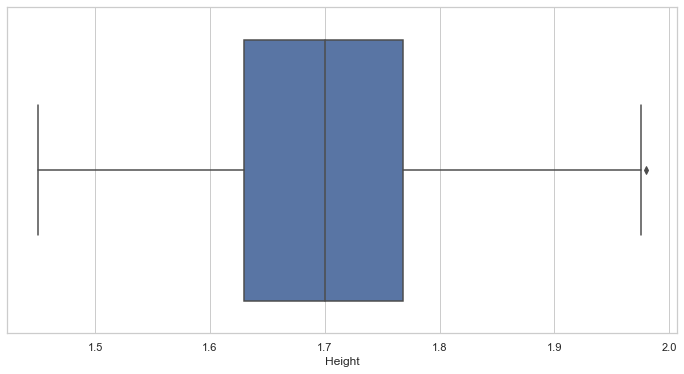

In [30]:
sns.boxplot(x = df2['Height']);

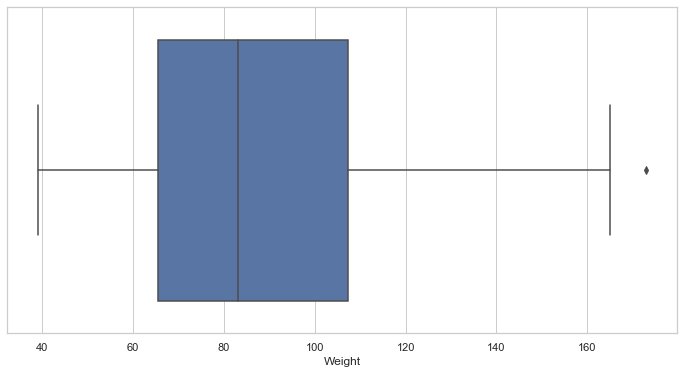

In [31]:
sns.boxplot(x = df2['Weight']);

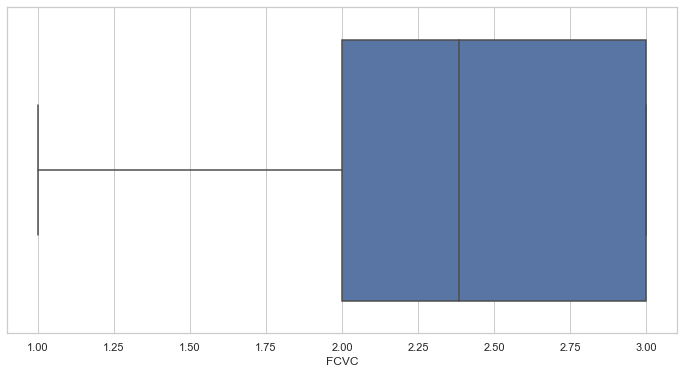

In [32]:
sns.boxplot(x = df2['FCVC']);

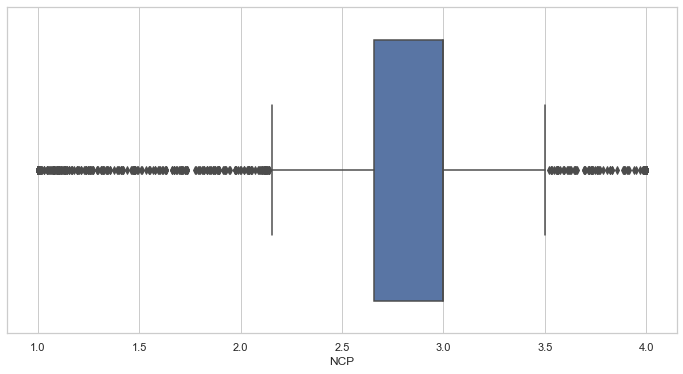

In [33]:
sns.boxplot(x = df2['NCP']);

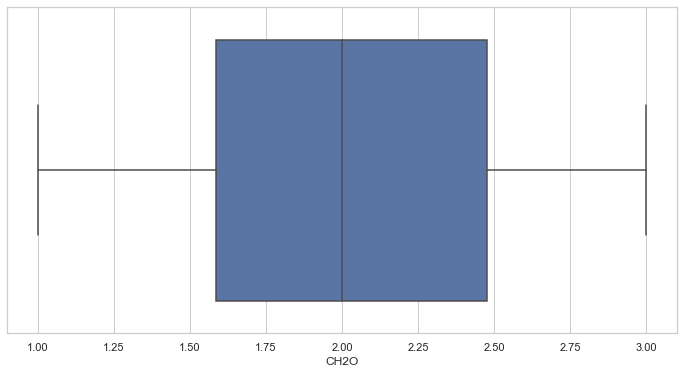

In [34]:
sns.boxplot(x = df2['CH2O']);

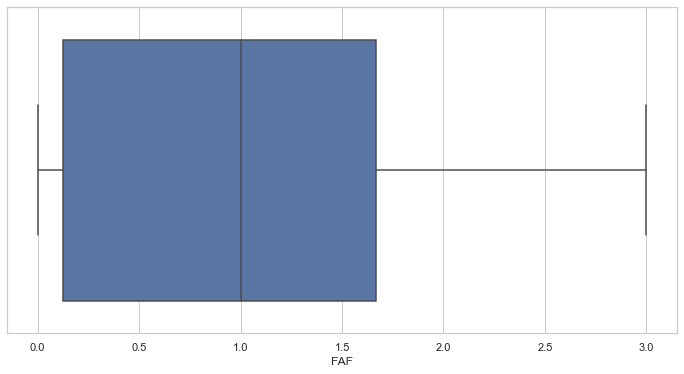

In [35]:
sns.boxplot(x = df2['FAF']);

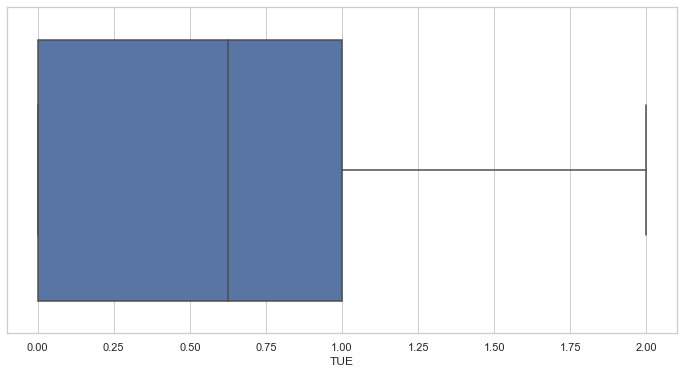

In [36]:
sns.boxplot(x = df2['TUE']);

In [37]:
rs = RobustScaler()
mms = MinMaxScaler()

df2['Age'] = rs.fit_transform(df2[['Age']])

# o robust scaler "piorou" a escala
#df2['NCP'] = rs.fit_transform(df2[['NCP']])

df2['Height'] = mms.fit_transform(df2[['Height']])

df2['Weight'] = mms.fit_transform(df2[['Weight']])

df2['FCVC'] = mms.fit_transform(df2[['FCVC']])

df2['CH2O'] = mms.fit_transform(df2[['CH2O']])

df2['FAF'] = mms.fit_transform(df2[['FAF']])

df2['TUE'] = mms.fit_transform(df2[['TUE']])

In [38]:
df2.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS           NObeyesdad
0  Female -0.29    0.32    0.19                            yes   no  0.50 3.00  Sometimes    no  0.50   no 0.00 0.50          no  Public_Transportation        Normal_Weight
1  Female -0.29    0.13    0.13                            yes   no  1.00 3.00  Sometimes   yes  1.00  yes 1.00 0.00   Sometimes  Public_Transportation        Normal_Weight
2    Male  0.04    0.66    0.28                            yes   no  0.50 3.00  Sometimes    no  0.50   no 0.67 0.50  Frequently  Public_Transportation        Normal_Weight
3    Male  0.70    0.66    0.36                             no   no  1.00 3.00  Sometimes    no  0.50   no 0.67 0.00  Frequently                Walking   Overweight_Level_I
4    Male -0.13    0.62    0.38                             no   no  0.50 1.00  Sometimes    no  0.50   no 0.00 0.00   Sometimes  Public_Transportation  Overweight_Level_II

## 3.2 Encoding

In [39]:
cat_attr.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [40]:
cat_attr.nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              4
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [41]:
df2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [42]:
temp_dict = {'Female': 1, 'Male': 0}
df2['Gender'] = df2['Gender'].map(temp_dict)

In [43]:
df2['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [44]:
temp_dict = {'yes': 1, 'no': 0}
df2['family_history_with_overweight'] = df2['family_history_with_overweight'].map(temp_dict)

In [45]:
df2['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [46]:
temp_dict = {'yes': 1, 'no': 0}
df2['FAVC'] = df2['FAVC'].map(temp_dict)

In [47]:
df2['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [48]:
ordinal_encoding = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df2['CAEC'] = df2['CAEC'].map(ordinal_encoding)

In [49]:
df2['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [50]:
temp_dict = {'yes': 1, 'no': 0}
df2['SMOKE'] = df2['SMOKE'].map(temp_dict)

In [51]:
df2['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [52]:
temp_dict = {'yes': 1, 'no': 0}
df2['SCC'] = df2['SCC'].map(temp_dict)

In [53]:
df2['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [54]:
ordinal_encoding = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df2['CALC'] = df2['CALC'].map(ordinal_encoding)

In [55]:
df2['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [56]:
frequency_encoder = df2.groupby('MTRANS').size()/len(df1)
df2.loc[:, 'MTRANS'] = df2['MTRANS'].map(frequency_encoder)

In [57]:
df2['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [58]:
temp_dict = {'Insufficient_Weight' : 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
df2['target'] = df2['NObeyesdad'].map(temp_dict)

In [59]:
df2.sample(5)

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  target
1932       1  0.53    0.36    0.49                               1     1  1.00 3.00     1      0  0.24    0 0.07 0.33     1    0.75     Obesity_Type_III       6
328        0 -0.62    0.55    0.26                               1     0  1.00 1.00     1      0  1.00    0 1.00 0.50     1    0.03        Normal_Weight       1
1677       0  1.21    0.74    0.63                               1     1  0.73 3.00     1      0  0.83    0 0.33 0.16     1    0.75      Obesity_Type_II       5
709        1 -0.79    0.47    0.08                               0     1  0.30 3.43     1      0  0.03    0 0.27 0.52     1    0.75  Insufficient_Weight       0
1769       0  0.39    0.61    0.56                               1     1  0.31 3.00     1      0  0.54    0 0.51 0.18     1    0.75      Obesity_Type_II       5

# 4.0 Feature Selection

## 4.1 Split Dataframe into Training Validation and Test Dataset

In [60]:
x_full, x_test, y_full, y_test = train_test_split(df2.drop(['NObeyesdad', 'target'], axis=1), df2['target'], random_state = 16, train_size=0.90)

print('\nTamanho treino: {}'.format(x_full.shape[0]))
print('Tamanho teste: {}'.format(x_test.shape[0]))


Tamanho treino: 1899
Tamanho teste: 212


In [61]:
X_train, X_val, y_train, y_val = train_test_split(x_full, y_full, random_state = 16, train_size=0.80)

print('\nTamanho treino: {}'.format(X_train.shape[0]))
print('Tamanho validação: {}'.format(X_val.shape[0]))


Tamanho treino: 1519
Tamanho validação: 380


## 4.2 Boruta as Feature Selector

In [62]:
# training and test dataset for Boruta
X_train_n = X_train.values
y_train_n = y_train.values.ravel()

In [63]:
# define RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-2)

# define Boruta
boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42).fit(X_train_n, y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	0
Rejected: 	4


In [64]:
cols_selected = boruta.support_.tolist()

# best features
X_train_fs = X_train
cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.to_list()

# not selected boruta
cols_not_selected_boruta = list(np.setdiff1d(X_train_fs.columns, cols_selected_boruta))

In [65]:
cols_selected_boruta

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FCVC',
 'NCP',
 'CAEC',
 'CH2O',
 'FAF',
 'TUE',
 'CALC']

In [66]:
cols_not_selected_boruta

['FAVC', 'MTRANS', 'SCC', 'SMOKE']

## 4.2 Feature Selection Using Random Forest Classifier

In [67]:
# model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-5, random_state=42 ).fit(X_train_n, y_train_n)

In [68]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
Weight                                0.35
Height                                0.10
Age                                   0.10
FCVC                                  0.08
Gender                                0.05
NCP                                   0.05
CH2O                                  0.04
FAF                                   0.04
TUE                                   0.04
CAEC                                  0.03
family_history_with_overweight        0.03
CALC                                  0.03
MTRANS                                0.02
FAVC                                  0.02
SCC                                   0.01
SMOKE                                 0.00

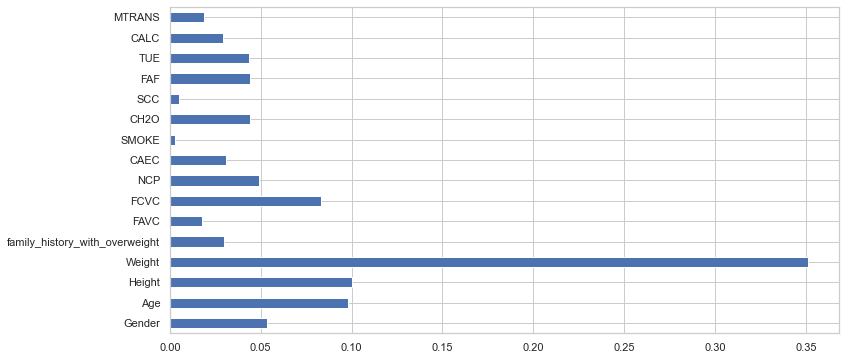

In [69]:
pd.Series(rf.feature_importances_, index=X_train.columns).plot(kind='barh');

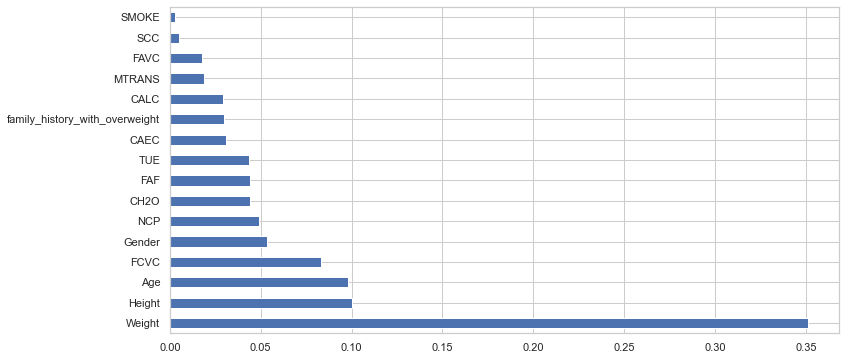

In [70]:
pd.Series(rf.feature_importances_, index=X_train.columns).nlargest(len(X_train.columns)).plot(kind='barh');

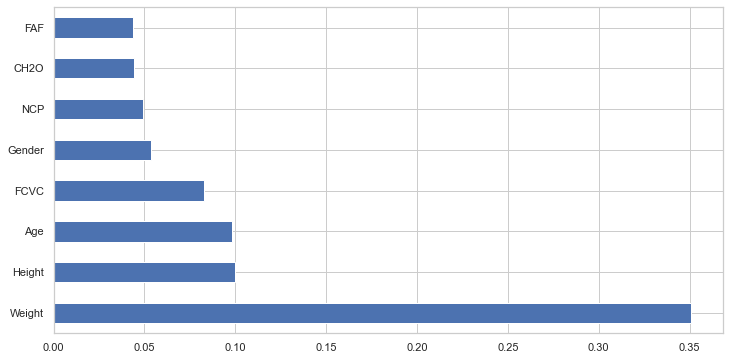

In [71]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh');

## 4.3 Feature Selection Using Extra-Trees Classifier

In [72]:
et = ExtraTreesClassifier(n_jobs=-5)
et.fit(X_train_n, y_train_n)

feature_importances = pd.DataFrame(et.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
Weight                                0.27
FCVC                                  0.08
Gender                                0.08
Age                                   0.08
Height                                0.08
NCP                                   0.06
CALC                                  0.05
family_history_with_overweight        0.05
TUE                                   0.05
CH2O                                  0.04
FAF                                   0.04
MTRANS                                0.04
CAEC                                  0.04
FAVC                                  0.03
SCC                                   0.01
SMOKE                                 0.01

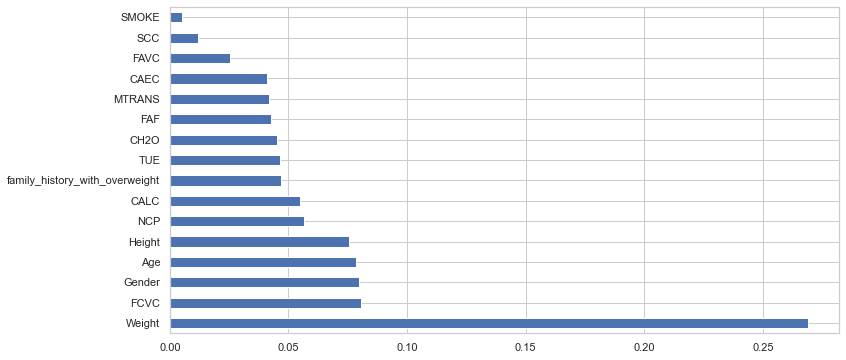

In [73]:
feat_importances = pd.Series(et.feature_importances_, X_train.columns)
feat_importances.nlargest(17).plot(kind='barh');

## 4.4 Manual Feature Selection

In [74]:
cols_selected = ['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FCVC',
 'NCP',
 'CAEC',
 'CH2O',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'FAVC']

target = df2['target']

# 5.0 Machine Learning Modelling

In [75]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=16)

def stratified_kfold_evaluation(skf, model, x, y):
    lst_accu_stratified = []

    for train_index, val_index in skf.split(x, y):
        model.fit(x.iloc[train_index], y.iloc[train_index])
        lst_accu_stratified.append(model.score(x.iloc[val_index], y.iloc[val_index]))
        y_pred = model.predict(x.iloc[val_index])
        print(classification_report(y.iloc[val_index], y_pred))

    # Print the output.
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy That can be obtained from this model is:',
          max(lst_accu_stratified)*100, '%')
    print('\nMinimum Accuracy:',
          min(lst_accu_stratified)*100, '%')
    print('\nOverall Accuracy:',
          mean(lst_accu_stratified)*100, '%')
    print('\nStandard Deviation:', np.std(lst_accu_stratified)*100, '%')

In [76]:
def classification_report_with_accuracy_score(y_true, y_pred):
  print(classification_report(y_true, y_pred))
  return accuracy_score(y_true, y_true)

## 5.1 Dummy Model

In [77]:
# Dummy model para servir de baseline

dummy_pred = randint(0, 6, size=y_val.shape)
classification_report_with_accuracy_score(y_val, dummy_pred)

              precision    recall  f1-score   support

           0       0.13      0.17      0.15        46
           1       0.10      0.13      0.11        46
           2       0.11      0.13      0.12        53
           3       0.13      0.16      0.14        51
           4       0.15      0.16      0.15        62
           5       0.20      0.21      0.20        58
           6       0.00      0.00      0.00        64

    accuracy                           0.13       380
   macro avg       0.12      0.14      0.13       380
weighted avg       0.11      0.13      0.12       380



C:\Users\Kamel\.conda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kamel\.conda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kamel\.conda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1.0

## 5.2 K-Nearest Neighbors (KNN)

In [78]:
knn = KNeighborsClassifier(n_neighbors=5)
stratified_kfold_evaluation(skf, knn, x_full, y_full)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.69      0.44      0.54        25
           2       0.87      0.74      0.80        27
           3       0.61      0.85      0.71        26
           4       0.88      0.88      0.88        32
           5       0.93      0.96      0.94        26
           6       1.00      0.97      0.98        29

    accuracy                           0.83       190
   macro avg       0.83      0.82      0.82       190
weighted avg       0.83      0.83      0.82       190

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.53      0.40      0.45        25
           2       0.83      0.74      0.78        27
           3       0.65      0.58      0.61        26
           4       0.83      0.91      0.87        32
           5       0.84      0.96      0.90        27
           6       1.00 

## 5.3 Decision Tree

In [79]:
dt = DecisionTreeClassifier()

In [80]:
stratified_kfold_evaluation(skf, dt, x_full, y_full)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.92      0.88      0.90        25
           2       0.93      0.96      0.95        27
           3       0.96      0.88      0.92        26
           4       0.91      0.94      0.92        32
           5       0.96      1.00      0.98        26
           6       1.00      0.97      0.98        29

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.91      0.80      0.85        25
           2       0.81      0.93      0.86        27
           3       1.00      0.85      0.92        26
           4       0.94      1.00      0.97        32
           5       1.00      1.00      1.00        27
           6       1.00 

## 5.4 Random Forest

In [81]:
rf = RandomForestClassifier()

In [82]:
stratified_kfold_evaluation(skf, rf, x_full, y_full)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.88      0.92      0.90        25
           2       0.96      0.93      0.94        27
           3       1.00      0.92      0.96        26
           4       0.94      1.00      0.97        32
           5       1.00      1.00      1.00        26
           6       1.00      0.97      0.98        29

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.75      0.96      0.84        25
           2       0.95      0.78      0.86        27
           3       1.00      0.85      0.92        26
           4       0.94      1.00      0.97        32
           5       1.00      1.00      1.00        27
           6       1.00 

## 5.5 Multilayer Perceptron (MLP)

In [83]:
mlp = MLPClassifier(max_iter=5000, random_state=16)

In [84]:
stratified_kfold_evaluation(skf, mlp, x_full, y_full)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.95      0.80      0.87        25
           2       0.90      0.96      0.93        27
           3       0.96      0.92      0.94        26
           4       0.94      0.97      0.95        32
           5       0.93      0.96      0.94        26
           6       1.00      0.97      0.98        29

    accuracy                           0.94       190
   macro avg       0.94      0.93      0.93       190
weighted avg       0.94      0.94      0.94       190

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.79      0.88      0.83        25
           2       0.78      0.78      0.78        27
           3       0.91      0.81      0.86        26
           4       0.97      0.97      0.97        32
           5       1.00      1.00      1.00        27
           6       1.00 

## 5.6 Naive-Bayes

In [85]:
nb = GaussianNB()

In [86]:
stratified_kfold_evaluation(skf, nb, x_full, y_full)

              precision    recall  f1-score   support

           0       0.68      0.92      0.78        25
           1       0.86      0.24      0.38        25
           2       0.40      0.15      0.22        27
           3       0.58      0.27      0.37        26
           4       0.40      0.50      0.44        32
           5       0.44      1.00      0.61        26
           6       1.00      0.97      0.98        29

    accuracy                           0.58       190
   macro avg       0.62      0.58      0.54       190
weighted avg       0.62      0.58      0.54       190

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       0.50      0.28      0.36        25
           2       0.67      0.30      0.41        27
           3       0.60      0.23      0.33        26
           4       0.44      0.50      0.47        32
           5       0.50      1.00      0.67        27
           6       1.00 

## 5.7 Support Vector Machine (SVM)

In [87]:
svm = SVC()

In [88]:
stratified_kfold_evaluation(skf, svm, x_full, y_full)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.77      0.40      0.53        25
           2       0.67      0.59      0.63        27
           3       0.55      0.65      0.60        26
           4       0.71      0.75      0.73        32
           5       0.78      0.96      0.86        26
           6       1.00      0.97      0.98        29

    accuracy                           0.74       190
   macro avg       0.75      0.74      0.73       190
weighted avg       0.75      0.74      0.73       190

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        25
           1       0.65      0.52      0.58        25
           2       0.82      0.67      0.73        27
           3       0.65      0.58      0.61        26
           4       0.74      0.78      0.76        32
           5       0.79      1.00      0.89        27
           6       1.00 

# 6.0 Hyperparameter Fine Tuning

## 6.1 Grid Search

## 6.1.1 KNN 

In [92]:
# knn_param = [
#     {'n_neighbors': np.arange(2, 21),
#      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#      'weights': ['uniform', 'distance'],
#      'metric': ['euclidean', 'manhattan', 'chebyshev']},
    
#      {'n_neighbors': np.arange(2, 21),
#       'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#       'weights': ['uniform', 'distance'],
#       'metric': ['seuclidean', 'mahalanobis'],
#       'metric_params': [{'V': np.cov(x_full)}]}
# ]

In [93]:
knn_param = {
    'n_neighbors': np.arange(2, 21),
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
     'weights': ['uniform', 'distance'],
     'metric': ['euclidean', 'manhattan', 'chebyshev']
}

In [94]:
grid_search = GridSearchCV(estimator=knn, param_grid=knn_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.870465051517683
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [95]:
# {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

## 6.1.2 Decision Tree

In [96]:
dt_param = {
    'max_depth': [None, 3, 5, 9, 12, 15],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 'auto', 'sqrt', 'log2']    
}

In [97]:
grid_search = GridSearchCV(estimator=dt, param_grid=dt_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9505068226120859
{'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [98]:
# {'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

## 6.1.3 Random Forest

In [99]:
rf_param = {
    'estimator__max_depth': [None, 3, 5, 9, 12, 15],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__plitter': ['best', 'random'],
    'estimator__min_samples_split': [2, 4, 6, 8],
    'estimator__min_samples_leaf': [1, 2, 3, 4, 5],
    'estimator__max_features': ['auto', 'sqrt', 'log2']    
}

In [100]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [101]:
# algum erro estranho está impedindo o grid search de rodar para a random forest

#grid_search = GridSearchCV(estimator=rf, param_grid=rf_param, cv=skf.split(x_full, y_full))
#grid_search.fit(x_full, y_full)

In [102]:
for param in grid_search.get_params().keys():
    print(param)

cv
error_score
estimator__ccp_alpha
estimator__class_weight
estimator__criterion
estimator__max_depth
estimator__max_features
estimator__max_leaf_nodes
estimator__min_impurity_decrease
estimator__min_samples_leaf
estimator__min_samples_split
estimator__min_weight_fraction_leaf
estimator__random_state
estimator__splitter
estimator
n_jobs
param_grid
pre_dispatch
refit
return_train_score
scoring
verbose


## 6.1.4 MLP

In [89]:
mlp_param = {
    'random_state':[16],
    'activation':['tanh', 'relu', 'identity', 'logistic'],
    'solver':['lbfgs', 'sgd', 'adam'],
    'alpha':[0.01, 0.001, 0.0001, 0.00001]
}

In [ ]:
grid_search = GridSearchCV(estimator=mlp, param_grid=mlp_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
# {'activation': 'identity', 'alpha': 0.01, 'solver': 'lbfgs'}

## 6.1.5 Naive Bayes

In [90]:
nb_param = {
    'var_smoothing':[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
}

In [91]:
# Sem hiperparametros para tunar
grid_search = GridSearchCV(estimator=nb, param_grid=nb_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.5987357282094125
{'var_smoothing': 0.001}


In [92]:
# {'var_smoothing': 0.001}

## 6.1.6 SVM

In [93]:
svm_param = {
    'C': [0.1, 0.3, 0.5, 0.75, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

In [94]:
grid_search = GridSearchCV(estimator=svm, param_grid=svm_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8278111946533
{'C': 1, 'kernel': 'linear'}


In [95]:
# C=1, kernel='linear'

# 7. Final Models

## 7.1 Final Models with all features

In [96]:
knn2 = KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=4, weights='distance')
stratified_kfold_evaluation(skf, knn2, x_full, y_full)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       0.83      0.60      0.70        25
           2       0.85      0.81      0.83        27
           3       0.79      0.85      0.81        26
           4       0.91      0.97      0.94        32
           5       0.93      1.00      0.96        26
           6       1.00      0.97      0.98        29

    accuracy                           0.89       190
   macro avg       0.89      0.89      0.88       190
weighted avg       0.89      0.89      0.89       190

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.65      0.60      0.63        25
           2       0.83      0.70      0.76        27
           3       0.78      0.81      0.79        26
           4       0.89      0.97      0.93        32
           5       0.93      0.96      0.95        27
           6       1.00 

In [97]:
svm2 = SVC(C=1, kernel='linear')
stratified_kfold_evaluation(skf, svm2, x_full, y_full)

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.80      0.48      0.60        25
           2       0.75      0.56      0.64        27
           3       0.57      0.77      0.66        26
           4       0.84      0.84      0.84        32
           5       0.90      1.00      0.95        26
           6       1.00      0.97      0.98        29

    accuracy                           0.80       190
   macro avg       0.81      0.80      0.79       190
weighted avg       0.81      0.80      0.79       190

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        25
           1       0.67      0.48      0.56        25
           2       0.89      0.63      0.74        27
           3       0.65      0.77      0.70        26
           4       0.88      0.88      0.88        32
           5       0.93      1.00      0.96        27
           6       1.00 

In [98]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter='best')
stratified_kfold_evaluation(skf, dt2, x_full, y_full)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        25
           2       0.96      0.96      0.96        27
           3       0.96      0.96      0.96        26
           4       0.97      1.00      0.98        32
           5       1.00      1.00      1.00        26
           6       1.00      0.97      0.98        29

    accuracy                           0.98       190
   macro avg       0.98      0.98      0.98       190
weighted avg       0.98      0.98      0.98       190

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.87      0.80      0.83        25
           2       0.78      0.93      0.85        27
           3       1.00      0.77      0.87        26
           4       0.91      1.00      0.96        32
           5       1.00      1.00      1.00        27
           6       1.00 

In [99]:
mlp2 = MLPClassifier(activation='identity', alpha=0.01, solver='lbfgs', max_iter=5000, random_state=16)
stratified_kfold_evaluation(skf, mlp2, x_full, y_full)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        25
           2       0.96      0.93      0.94        27
           3       0.93      0.96      0.94        26
           4       1.00      0.97      0.98        32
           5       0.93      1.00      0.96        26
           6       1.00      0.97      0.98        29

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.89      0.96      0.92        25
           2       0.90      0.96      0.93        27
           3       1.00      0.92      0.96        26
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        27
           6       1.00 

## 7.2 Final Models without Smoke and SCC

In [100]:
x_full_select, x_test_select, y_full_select, y_test_select = train_test_split(df2.drop(['NObeyesdad', 'target', 'SMOKE', 'SCC'], axis=1), df2['target'], random_state = 16, train_size=0.90)

print('\nTamanho treino: {}'.format(x_full_select.shape[0]))
print('Tamanho teste: {}'.format(x_test_select.shape[0]))


Tamanho treino: 1899
Tamanho teste: 212


In [101]:
x_full_select.shape

(1899, 14)

In [102]:
X_train_select, X_val_select, y_train, y_val = train_test_split(x_full_select, y_full_select, random_state = 16, train_size=0.80)

print('\nTamanho treino: {}'.format(X_train_select.shape[0]))
print('Tamanho validação: {}'.format(X_val_select.shape[0]))


Tamanho treino: 1519
Tamanho validação: 380


In [103]:
knn2 = KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=4, weights='distance')
stratified_kfold_evaluation(skf, knn2, x_full_select, y_full_select)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       0.78      0.56      0.65        25
           2       0.78      0.78      0.78        27
           3       0.79      0.85      0.81        26
           4       0.91      0.97      0.94        32
           5       0.93      1.00      0.96        26
           6       1.00      0.97      0.98        29

    accuracy                           0.88       190
   macro avg       0.87      0.87      0.87       190
weighted avg       0.88      0.88      0.87       190

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.58      0.60      0.59        25
           2       0.82      0.67      0.73        27
           3       0.81      0.81      0.81        26
           4       0.88      0.94      0.91        32
           5       0.93      0.96      0.95        27
           6       1.00 

In [104]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter='best')
stratified_kfold_evaluation(skf, dt2, x_full_select, y_full_select)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        27
           3       0.96      0.92      0.94        26
           4       0.91      1.00      0.96        32
           5       1.00      1.00      1.00        26
           6       1.00      0.97      0.98        29

    accuracy                           0.97       190
   macro avg       0.98      0.97      0.97       190
weighted avg       0.98      0.97      0.97       190

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.91      0.84      0.87        25
           2       0.83      0.93      0.88        27
           3       0.95      0.81      0.88        26
           4       0.91      0.97      0.94        32
           5       1.00      1.00      1.00        27
           6       1.00 

In [105]:
mlp2 = MLPClassifier(activation='identity', alpha=0.01, solver='lbfgs', max_iter=5000, random_state=16)
stratified_kfold_evaluation(skf, mlp2, x_full_select, y_full_select)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.92      0.96        25
           2       0.93      0.93      0.93        27
           3       0.93      0.96      0.94        26
           4       1.00      0.97      0.98        32
           5       0.93      1.00      0.96        26
           6       1.00      0.97      0.98        29

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        25
           2       0.93      1.00      0.96        27
           3       1.00      0.92      0.96        26
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        27
           6       1.00 

In [106]:
nb2 = GaussianNB(var_smoothing=0.001)
stratified_kfold_evaluation(skf, nb2, x_full_select, y_full_select)

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        25
           1       0.80      0.32      0.46        25
           2       0.50      0.22      0.31        27
           3       0.58      0.27      0.37        26
           4       0.40      0.69      0.51        32
           5       0.61      0.96      0.75        26
           6       1.00      0.97      0.98        29

    accuracy                           0.63       190
   macro avg       0.66      0.62      0.60       190
weighted avg       0.65      0.63      0.60       190

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        25
           1       0.50      0.32      0.39        25
           2       0.69      0.33      0.45        27
           3       0.56      0.19      0.29        26
           4       0.38      0.50      0.43        32
           5       0.57      0.96      0.71        27
           6       1.00 

In [107]:
svm2 = SVC(kernel='linear')
stratified_kfold_evaluation(skf, svm2, x_full_select, y_full_select)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.85      0.44      0.58        25
           2       0.73      0.59      0.65        27
           3       0.57      0.77      0.66        26
           4       0.85      0.88      0.86        32
           5       0.90      1.00      0.95        26
           6       1.00      0.97      0.98        29

    accuracy                           0.81       190
   macro avg       0.81      0.80      0.79       190
weighted avg       0.82      0.81      0.80       190

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        25
           1       0.72      0.52      0.60        25
           2       0.82      0.67      0.73        27
           3       0.68      0.73      0.70        26
           4       0.88      0.91      0.89        32
           5       0.93      1.00      0.96        27
           6       1.00 

# 8. Metrics with Test Data

In [108]:
x_test.shape

(212, 16)

In [109]:
y_test.shape

(212,)

## 8.1 K-Nearest Neighbors

In [110]:
knn = knn.fit(x_full, y_full)

res_knn = knn.predict(x_test)

print(classification_report(y_test, res_knn))

              precision    recall  f1-score   support

           0       0.63      0.85      0.72        26
           1       0.62      0.48      0.55        31
           2       0.78      0.78      0.78        23
           3       0.83      0.70      0.76        27
           4       0.83      0.88      0.86        34
           5       0.94      0.94      0.94        31
           6       1.00      1.00      1.00        40

    accuracy                           0.82       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.82      0.82      0.81       212



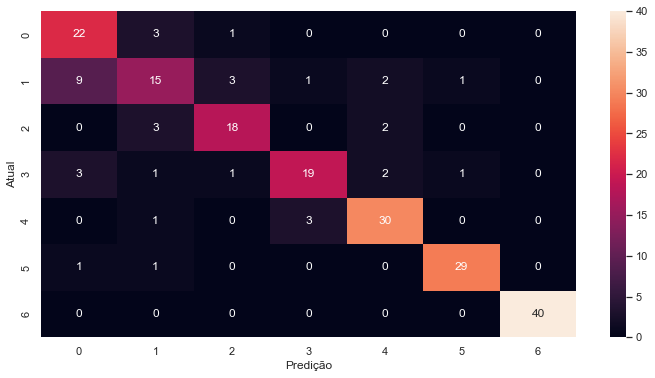

In [111]:
confusion_matrix = pd.crosstab(y_test, res_knn, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

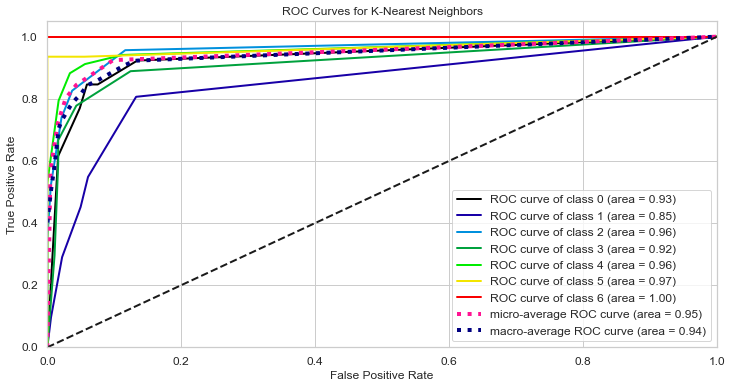

In [112]:
y_pred_proba_knn = knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_knn);
plt.title('ROC Curves for K-Nearest Neighbors');

In [113]:
knn2 = knn2.fit(x_full, y_full)

res_knn2 = knn2.predict(x_test)

print(classification_report(y_test, res_knn2))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81        26
           1       0.78      0.68      0.72        31
           2       0.83      0.87      0.85        23
           3       0.88      0.78      0.82        27
           4       0.86      0.91      0.89        34
           5       0.97      0.94      0.95        31
           6       1.00      1.00      1.00        40

    accuracy                           0.87       212
   macro avg       0.87      0.87      0.86       212
weighted avg       0.87      0.87      0.87       212



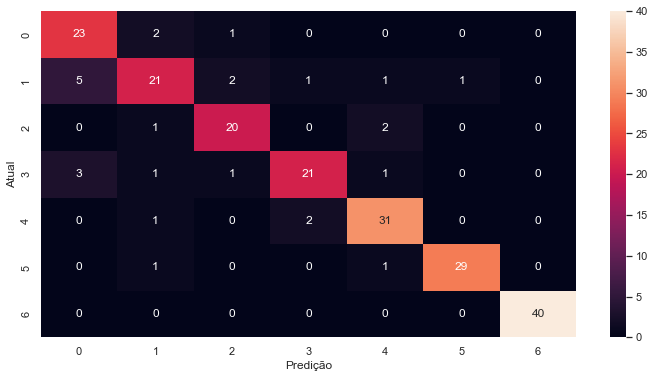

In [114]:
confusion_matrix = pd.crosstab(y_test, res_knn2, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

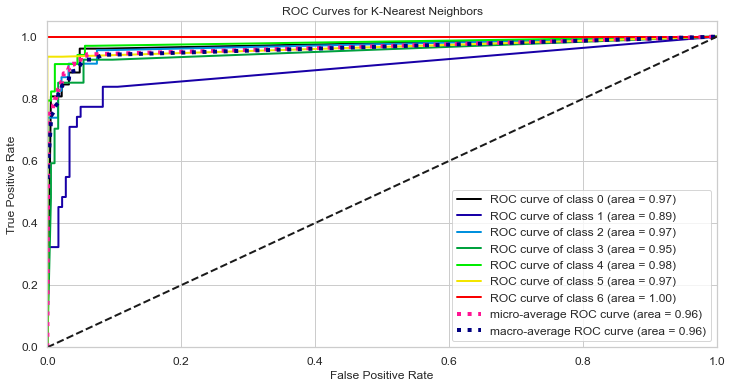

In [115]:
y_pred_proba_knn2 = knn2.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_knn2);
plt.title('ROC Curves for K-Nearest Neighbors');

## 8.2 Decision Tree

In [116]:
dt = dt.fit(x_full, y_full)

res_dt = dt.predict(x_test)

print(classification_report(y_test, res_dt))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.88      0.90      0.89        31
           2       0.83      0.87      0.85        23
           3       0.93      0.93      0.93        27
           4       0.84      0.91      0.87        34
           5       0.93      0.84      0.88        31
           6       1.00      1.00      1.00        40

    accuracy                           0.92       212
   macro avg       0.91      0.91      0.91       212
weighted avg       0.92      0.92      0.92       212



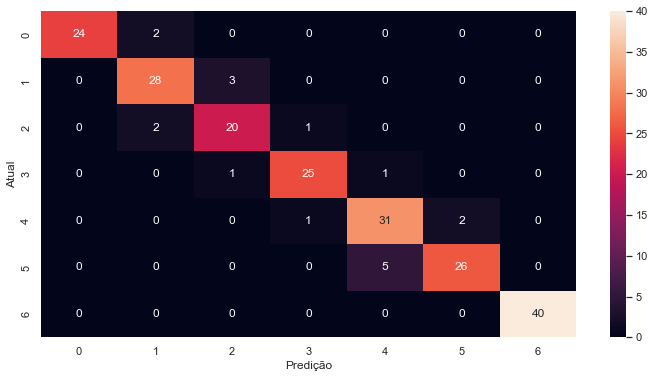

In [117]:
confusion_matrix = pd.crosstab(y_test, res_dt, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

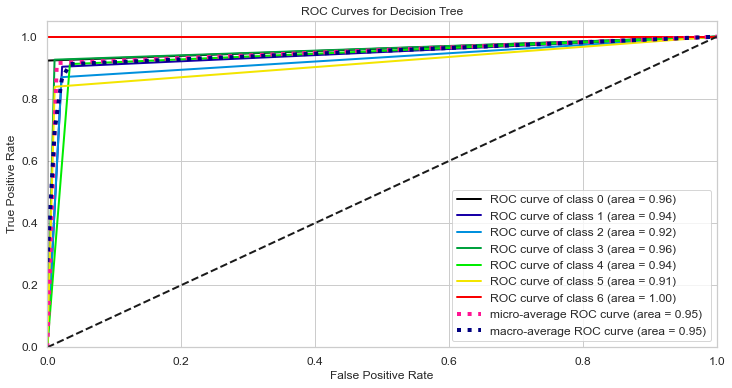

In [118]:
y_pred_proba_dt = dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_dt);
plt.title('ROC Curves for Decision Tree');

In [119]:
dt2 = dt2.fit(x_full, y_full)

res_dt2 = dt2.predict(x_test)

print(classification_report(y_test, res_dt2))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.94      1.00      0.97        31
           2       0.88      0.96      0.92        23
           3       0.96      0.85      0.90        27
           4       0.94      0.94      0.94        34
           5       0.94      0.97      0.95        31
           6       1.00      1.00      1.00        40

    accuracy                           0.95       212
   macro avg       0.95      0.95      0.95       212
weighted avg       0.95      0.95      0.95       212



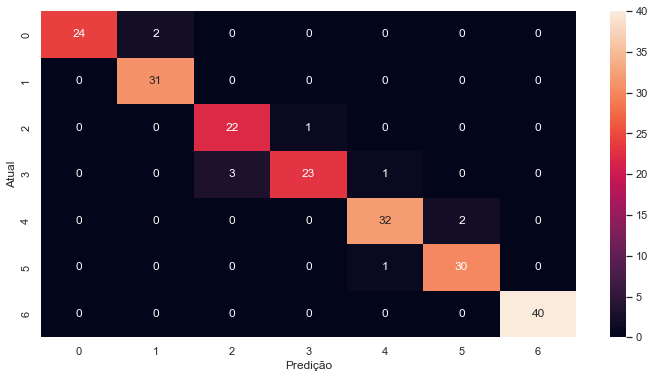

In [120]:
confusion_matrix = pd.crosstab(y_test, res_dt2, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

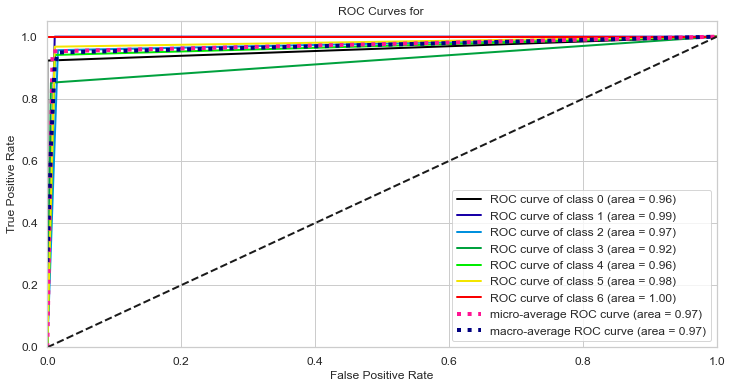

In [121]:
y_pred_proba_dt2 = dt2.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_dt2);
plt.title('ROC Curves for ');

## 8.3 Random Forest

In [122]:
rf = rf.fit(x_full, y_full)

res_rf = rf.predict(x_test)

print(classification_report(y_test, res_rf))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.83      0.97      0.90        31
           2       0.96      0.96      0.96        23
           3       1.00      0.96      0.98        27
           4       0.97      0.94      0.96        34
           5       0.97      0.94      0.95        31
           6       1.00      1.00      1.00        40

    accuracy                           0.96       212
   macro avg       0.96      0.96      0.96       212
weighted avg       0.96      0.96      0.96       212



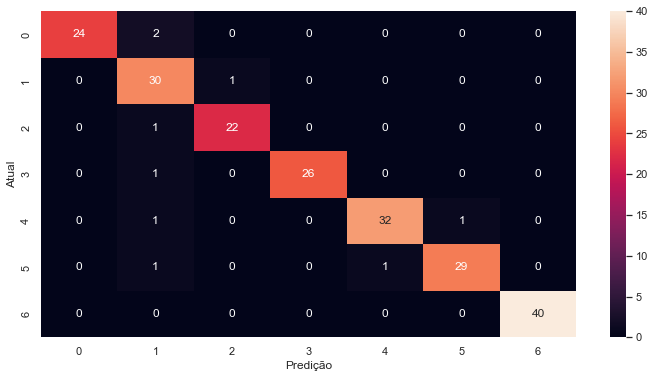

In [123]:
confusion_matrix = pd.crosstab(y_test, res_rf, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

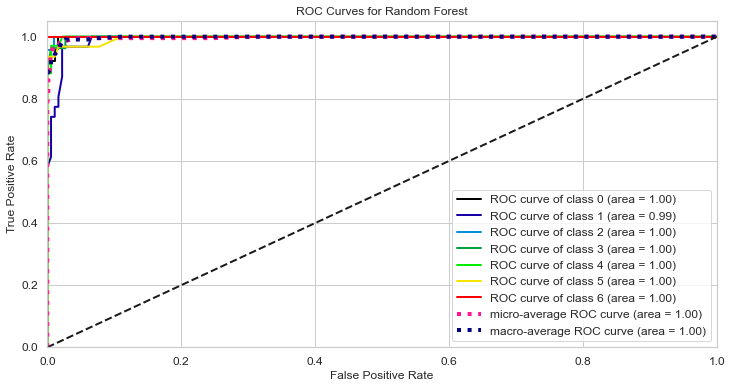

In [124]:
y_pred_proba_rf = rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_rf);
plt.title('ROC Curves for Random Forest');

## 8.4 Multilayer Perceptron

In [125]:
mlp = mlp.fit(x_full, y_full)

res_mlp = mlp.predict(x_test)

print(classification_report(y_test, res_mlp))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.91      0.97      0.94        31
           2       0.88      0.96      0.92        23
           3       0.96      0.93      0.94        27
           4       0.94      1.00      0.97        34
           5       1.00      0.94      0.97        31
           6       1.00      1.00      1.00        40

    accuracy                           0.96       212
   macro avg       0.96      0.95      0.95       212
weighted avg       0.96      0.96      0.96       212



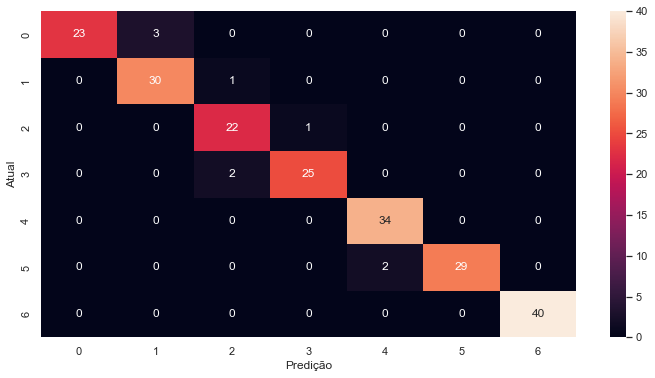

In [126]:
confusion_matrix = pd.crosstab(y_test, res_mlp, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

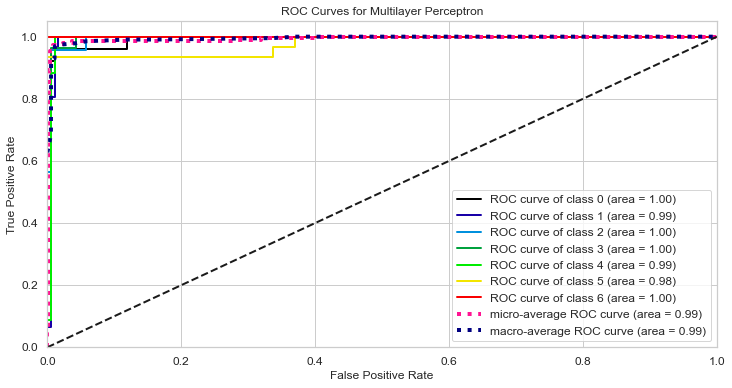

In [127]:
y_pred_proba_mlp = mlp.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_mlp);
plt.title('ROC Curves for Multilayer Perceptron');

In [128]:
mlp2 = mlp2.fit(x_full, y_full)

res_mlp2 = mlp2.predict(x_test)

print(classification_report(y_test, res_mlp2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.94      0.97      0.95        31
           2       0.95      0.87      0.91        23
           3       0.93      0.96      0.95        27
           4       0.97      0.97      0.97        34
           5       1.00      0.94      0.97        31
           6       0.95      1.00      0.98        40

    accuracy                           0.96       212
   macro avg       0.96      0.95      0.95       212
weighted avg       0.96      0.96      0.96       212



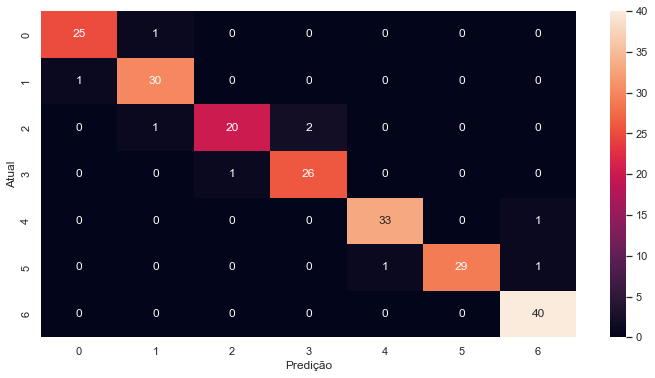

In [129]:
confusion_matrix = pd.crosstab(y_test, res_mlp2, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

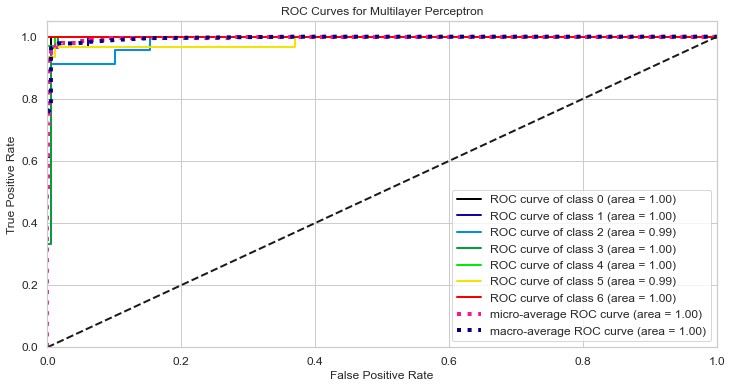

In [130]:
y_pred_proba_mlp2 = mlp2.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_mlp2);
plt.title('ROC Curves for Multilayer Perceptron');

## 8.5 Naive-Bayes

In [131]:
nb = nb.fit(x_full, y_full)

res_nb = nb.predict(x_test)

print(classification_report(y_test, res_nb))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.50      0.35      0.42        31
           2       0.47      0.30      0.37        23
           3       0.67      0.22      0.33        27
           4       0.39      0.35      0.37        34
           5       0.48      0.94      0.64        31
           6       1.00      1.00      1.00        40

    accuracy                           0.60       212
   macro avg       0.59      0.58      0.55       212
weighted avg       0.61      0.60      0.58       212



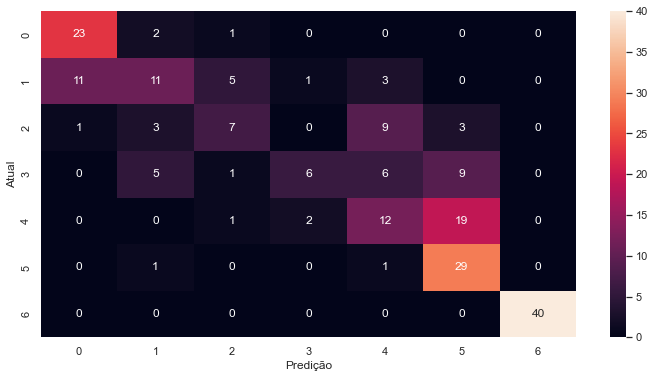

In [132]:
confusion_matrix = pd.crosstab(y_test, res_nb, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

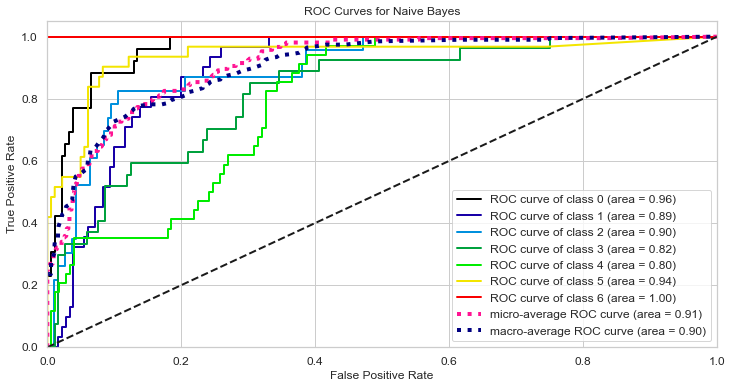

In [133]:
y_pred_proba_nb = nb.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_nb);
plt.title('ROC Curves for Naive Bayes');

In [134]:
nb2 = nb2.fit(x_full, y_full)

res_nb2 = nb2.predict(x_test)

print(classification_report(y_test, res_nb2))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72        26
           1       0.58      0.35      0.44        31
           2       0.47      0.30      0.37        23
           3       0.67      0.22      0.33        27
           4       0.37      0.47      0.42        34
           5       0.58      0.90      0.71        31
           6       1.00      1.00      1.00        40

    accuracy                           0.62       212
   macro avg       0.61      0.59      0.57       212
weighted avg       0.63      0.62      0.59       212



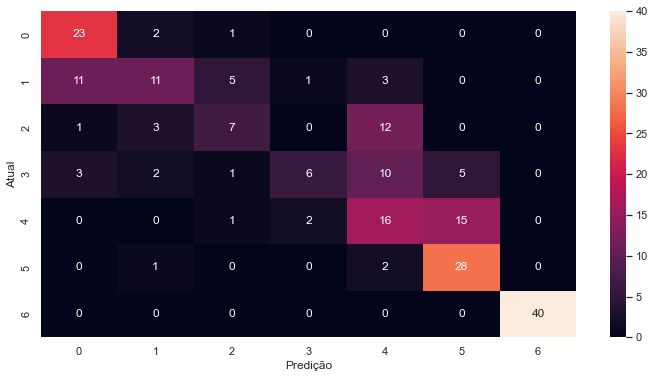

In [135]:
confusion_matrix = pd.crosstab(y_test, res_nb2, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

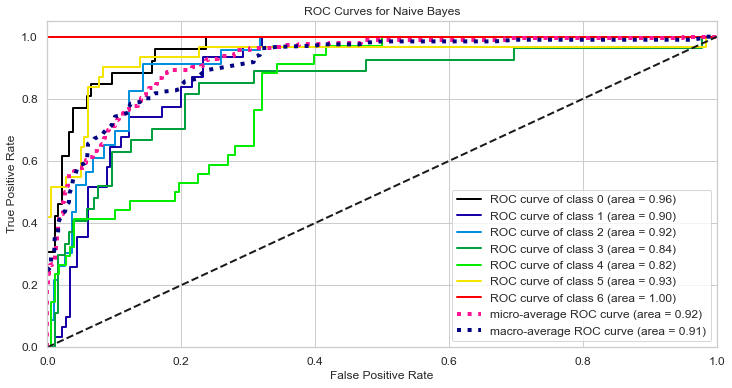

In [136]:
y_pred_proba_nb2 = nb2.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_nb2);
plt.title('ROC Curves for Naive Bayes');

## 8.6 Support Vector Machine

In [137]:
svm = SVC(probability=True)
svm2 = SVC(C=1, kernel='linear', probability=True)

In [138]:
svm = svm.fit(x_full, y_full)

res_svm = svm.predict(x_test)

print(classification_report(y_test, res_svm))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        26
           1       0.62      0.52      0.56        31
           2       0.62      0.65      0.64        23
           3       0.82      0.67      0.73        27
           4       0.69      0.74      0.71        34
           5       0.85      0.94      0.89        31
           6       1.00      1.00      1.00        40

    accuracy                           0.78       212
   macro avg       0.76      0.76      0.76       212
weighted avg       0.78      0.78      0.77       212



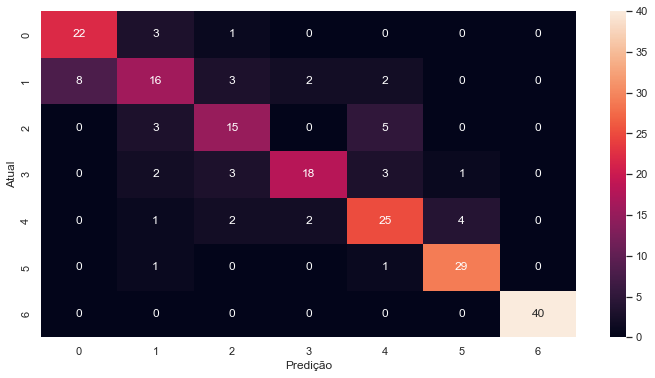

In [139]:
confusion_matrix = pd.crosstab(y_test, res_svm, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

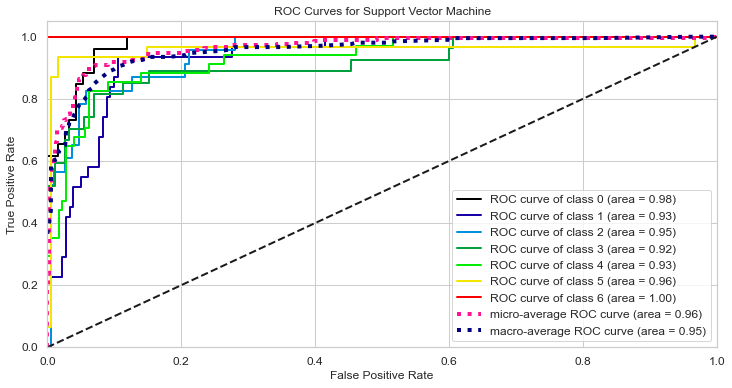

In [140]:
y_pred_proba_svm = svm.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_svm);
plt.title('ROC Curves for Support Vector Machine');

In [141]:
svm2 = svm2.fit(x_full, y_full)

res_svm2 = svm2.predict(x_test)

print(classification_report(y_test, res_svm2))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        26
           1       0.83      0.65      0.73        31
           2       0.77      0.74      0.76        23
           3       0.75      0.78      0.76        27
           4       0.87      0.79      0.83        34
           5       0.85      0.94      0.89        31
           6       1.00      1.00      1.00        40

    accuracy                           0.84       212
   macro avg       0.83      0.84      0.83       212
weighted avg       0.85      0.84      0.84       212



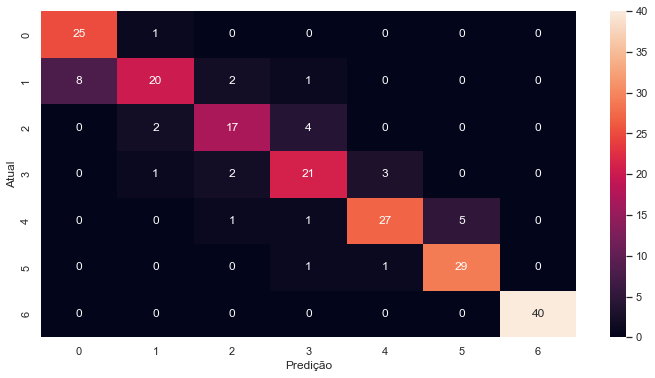

In [142]:
confusion_matrix = pd.crosstab(y_test, res_svm2, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

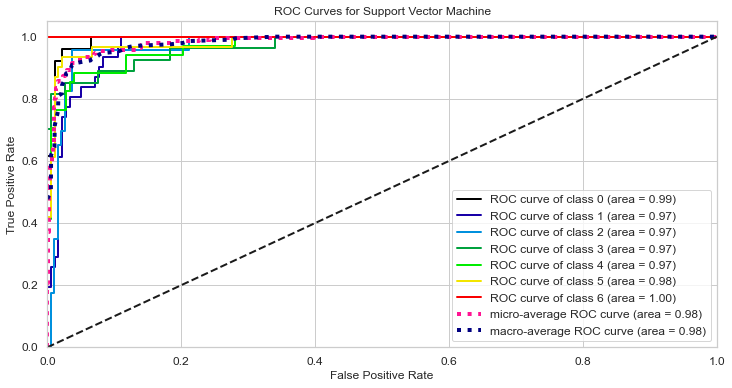

In [143]:
y_pred_proba_svm2 = svm2.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_pred_proba_svm2);
plt.title('ROC Curves for Support Vector Machine');